In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xml.dom import minidom
from mpl_toolkits.basemap import Basemap
import geopandas

# Data from https://www.enr-scvotes.org/SC/100517/Web02-state.242137/#/
mydoc = minidom.parse('detail.xml')

In [2]:
items = mydoc.getElementsByTagName('Choice')

all_canidates = []
for item in items:
    canidate_name = item.attributes['text'].value
    canidate_votes = []
    voteType = item.getElementsByTagName('VoteType')
    for vt in voteType:
        vote_type = vt.attributes['name'].value
        county = vt.getElementsByTagName('County')
        for c in county:
            county_name = c.attributes['name'].value
            num_votes = c.attributes['votes'].value
            
            all_canidates.append({"canidate": canidate_name, 
                                  "VoteType": vote_type,
                                  "County": county_name, 
                                  "Num": np.int32(num_votes) })

In [3]:
df = pd.DataFrame(all_canidates)
df.set_index(['canidate', 'County', 'VoteType'], inplace=True)
df.sort_index(inplace=True)
df.head(100)

Num
canidate      County    VoteType               
Amy Klobuchar Abbeville Absentee By Mail      0
                        Election Day         37
                        In-Person Absentee    5
              Aiken     Absentee By Mail     23
                        Election Day        502
...                                         ...
              Lexington In-Person Absentee   88
              Marion    Absentee By Mail      1
                        Election Day         33
                        In-Person Absentee    4
              Marlboro  Absentee By Mail      0

[100 rows x 1 columns]

In [4]:
df_un = df.unstack(level=1)
df_un = df_un.droplevel('VoteType')
df_un = df_un.groupby(df_un.index).sum()
df_un = df_un['Num']
df_un = df_un.T
df_un.head()

canidate,Amy Klobuchar,Andrew Yang - WITHDREW,Bernie Sanders,Cory Booker - WITHDREW,Deval Patrick - WITHDREW,Elizabeth Warren,John K Delaney - WITHDREW,Joseph R Biden,Michael Bennet - WITHDREW,Pete Buttigieg,Tom Steyer,Tulsi Gabbard
County,,,,,,,,,,,,
Abbeville,42,6,286,6,2,60,3,1129,5,80,312,26
Aiken,607,39,3169,20,6,1030,8,6765,29,1245,1986,194
Allendale,2,1,119,2,0,17,0,552,2,9,241,2
Anderson,524,34,3121,26,3,984,8,5553,9,987,1801,229
Bamberg,19,2,277,5,0,43,3,1099,5,26,387,4


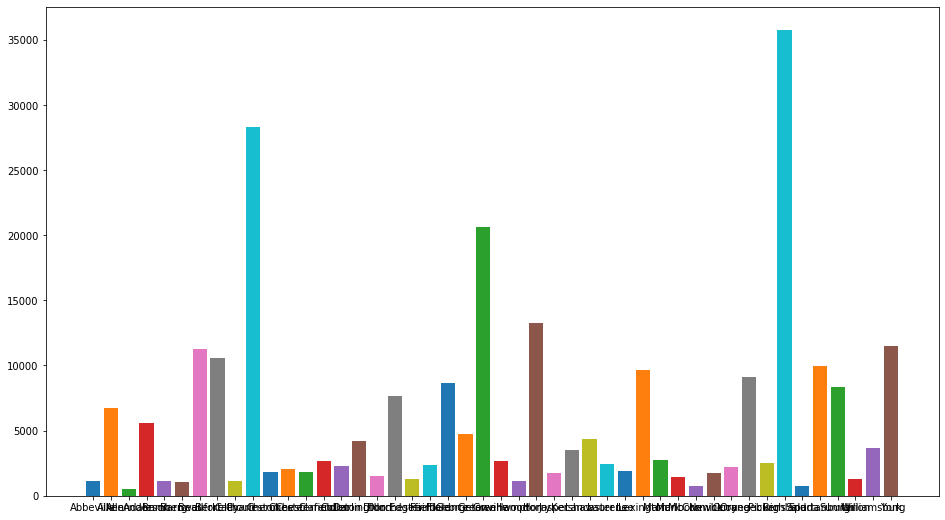

In [5]:
fig = plt.figure(figsize=(16,9))

for each,i in zip(df_un['Joseph R Biden'], range(0,len(df_un['Joseph R Biden']))):
    plt.bar(df_un['Joseph R Biden'].index[i], each)
        
plt.show()

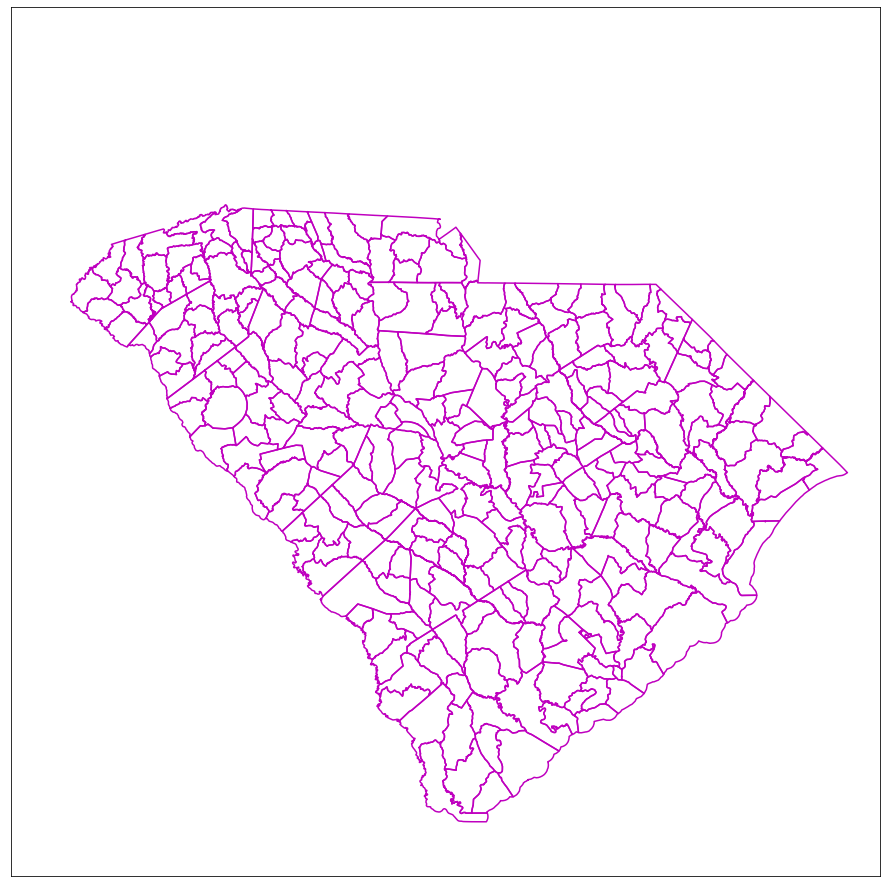

In [52]:
fig = plt.figure(figsize=(16,16))

_map = Basemap(width=500000, height=500000, lat_0=34,lon_0=-81, projection='stere')
_map.readshapefile('tl_2016_45_cousub', 'SouthCarolina', drawbounds = False)

for info, shape in zip(_map.SouthCarolina_info, _map.SouthCarolina):
    df_un['Joseph R Biden']
    info['NAME']
    x, y = zip(*shape) 
    _map.plot(x, y, marker=None,color='m')
plt.show()
